# Project: Dataset Exploration and Cleaning

Dataset: Titanic: Machine Learning from Disaster - Kaggle (https://www.kaggle.com/c/titanic/data) "smartCard-inline")

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# READ DATASET
data=pd.read_csv(r"F:\train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
yes = data[data['Survived'] == 1].shape[0]
no = data[data['Survived'] == 0].shape[0]

# Print the counts
print("Number of Survivors:", yes)
print("Number of Deceased:", no)

Number of Survivors: 342
Number of Deceased: 549


# Step 1: Remove duplicates from the dataset.

In [4]:
# Check for duplicates
duplicates = data.duplicated()
# Remove duplicates
data = data.drop_duplicates()
# Print the results
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


# Step 2: Handle missing values by imputing or removing them.

In [5]:
#checking null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#replacing with mean values
data["Age"].fillna(data["Age"].mean(), inplace = True)
data["Cabin"].fillna(data["Cabin"].mode().iloc[0], inplace = True)
data["Embarked"].fillna(data["Embarked"].mode().iloc[0], inplace=True)
#confirming there are no null values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Step 3: Check and handle outliers in the data.

<AxesSubplot:>

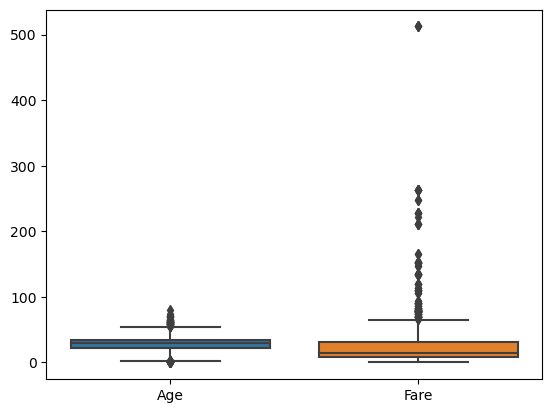

In [14]:
# Visual inspection of numerical features using box plots
features = ['Age', 'Fare']

# Plotting box plot for the selected features
sns.boxplot(data=data[features])

In [15]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
IQR

13.0

In [16]:
#finding limits
lower_limit = Q1-1.5*IQR
upper_limit = Q3 +1.5*IQR

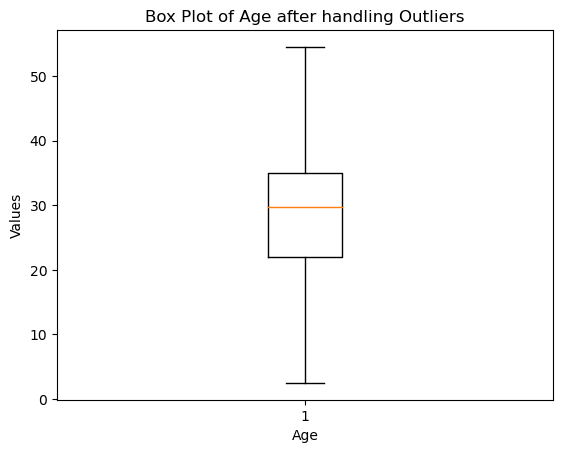

In [17]:
# Handling outliers
# Replace the outliers with the upper or lower limits
data['Age'] = np.where(data['Age'] < lower_limit, lower_limit, data['Age'])
data['Age'] = np.where(data['Age'] > upper_limit, upper_limit, data['Age'])
# Plotting updated box plot
plt.boxplot(data['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age after handling Outliers')
plt.show()

# Step 4: Normalize or standardize numerical features.

In [18]:
# Selecting the numerical features
numerical_features = ['Age', 'Fare','Parch']

# Normalizing the features 
scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data[numerical_features]), columns=numerical_features)

In [19]:
data_normalized

,Age,Fare,Parch
0,0.375000,0.014151,0.000000
1,0.682692,0.139136,0.000000
2,0.451923,0.015469,0.000000
3,0.625000,0.103644,0.000000
4,0.625000,0.015713,0.000000
...,...,...,...
886,0.471154,0.025374,0.000000
887,0.317308,0.058556,0.000000
888,0.523060,0.045771,0.333333
889,0.451923,0.058556,0.000000


# Step 5: Encode categorical variables.

In [20]:
# Performing one-hot encoding [because there is no inherent order in data features]
encoded_data = pd.get_dummies(data, columns=['Sex'],drop_first=True)
encoded_data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,B96 B98,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,B96 B98,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,B96 B98,S,0
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,C,1
